In [2]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
import re

In [3]:
raw_data = pd.read_csv('Amazon_Unlocked_Mobile.csv')

In [4]:
raw_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [5]:
product_name = []
for item in raw_data["Product Name"]:
    if (item in product_name):
        continue
    else:
        product_name.append(item)


In [6]:
len(product_name) # 4410 phones

4410

In [7]:
raw_data["Brand Name"]
brands = []
for item in raw_data["Brand Name"]:
    if (item in brands):
        continue
    else:
        brands.append(item)

In [8]:
len(brands) # Total Brands in the dataset

385

In [9]:
raw_data_df = pd.DataFrame(raw_data) #converting the data into a pandas dataframe.

In [10]:
raw_data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [11]:
from sklearn.utils import shuffle
raw_data_df = shuffle(raw_data_df) #Shuffle Data 

In [12]:
raw_data_df[:10]

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
178070,CNPGD Watch Cell Phone Mobile Touch Screen Mp3...,CNPGD,29.99,1,The picture of the product is not what you act...,0.0
55385,Apple iPhone 6 Plus 128GB Factory Unlocked GSM...,NaN,699.95,5,exactly as described. super fast shipping.,0.0
318742,Samsung Galaxy J7 J700M 16GB Dual Sim LTE Unlo...,Samsung,227.14,5,Yep! I absolutely love this phone. It is so fa...,5.0
266324,Nokia E72 Unlocked Phone Featuring GPS with Vo...,Nokia,99.99,5,I got my E72 2 days ago.I'm thrilled.It's a wo...,1.0
388823,Sony Xperia E C1504 Unlocked Android Phone--U....,Sony,189.99,4,Good phone and simple to use and it doesn't co...,0.0
245425,Moto X Pure Edition Unlocked Smartphone With R...,Motorola,349.00,5,perfect phone I just love it buy it your be gl...,0.0
376218,Samsung Galaxy Tab P1000 (SC-01C) - GSM Unlock...,Samsung,333.99,1,Unable to use phone,0.0
165057,BLU Win Jr LTE - GSM Unlocked Windows Smartpho...,BLU,85.09,3,"Having internal memory issues, phone identical...",0.0
109287,BLU Dash J Unlocked Phone - Retail Packaging -...,BLU,39.99,5,I liked,1.0
41824,Apple iPhone 5S 32 gb (Space Gray) - AT&T,NaN,135.00,2,Battery was no good,0.0


In [13]:
#Eliminating null values
raw_data_df = raw_data_df.dropna()

In [14]:
raw_data_df.describe() 

,Price,Rating,Review Votes
count,334335.000000,334335.000000,334335.000000
mean,222.585019,3.824888,1.474515
std,283.139353,1.541203,9.217348
min,1.730000,1.000000,0.000000
25%,75.410000,3.000000,0.000000
50%,139.000000,5.000000,0.000000
75%,264.100000,5.000000,1.000000
max,2598.000000,5.000000,645.000000


In [15]:
#Creation of pivot to Visualize 
info = pd.pivot_table(raw_data_df,index=['Brand Name'],values=['Rating', 'Review Votes'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
info = info.sort_values(by=('sum', 'Rating'), ascending = False)

info.head(10)


sum                   mean             
            Rating Review Votes    Rating Review Votes
Brand Name                                            
Samsung     250452        96057  3.973032     1.523795
BLU         226085        54798  3.821069     0.926143
Apple       220286       112211  3.926597     2.000160
LG           83266        22929  3.848493     1.059762
BlackBerry   61892        21114  3.750121     1.279326
Nokia        61833        25684  3.824879     1.588767
Motorola     49564        23107  3.811736     1.777051
HTC          42873        12777  3.474030     1.035329
CNPGD        38233        20151  3.107869     1.638026
OtterBox     34556         2268  4.385279     0.287817

In [16]:
import matplotlib.pyplot as plt
ylabel = raw_data_df["Price"]
plt.ylabel("Price")
plt.xlabel("Rating")
xlabel = raw_data_df["Rating"]
plt.scatter(xlabel, ylabel, alpha=0.1)
plt.show()

<Figure size 640x480 with 1 Axes>

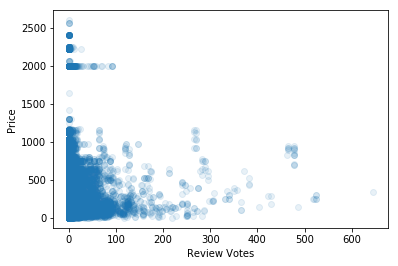

In [17]:
#co-relation between price and review votes
ylabel2 = raw_data_df["Price"]
plt.ylabel("Price")
xlabel2 = raw_data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

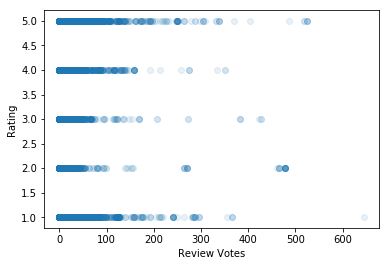

In [18]:
#Correlation between Rating and Review Votes
ylabel3 = raw_data_df["Rating"]
plt.ylabel("Rating")
xlabel3 = raw_data_df["Review Votes"]
plt.xlabel("Review Votes")
plt.scatter(xlabel3, ylabel3, alpha=0.1)
plt.show()

In [19]:
corr_matrix = raw_data_df.corr()
corr_matrix["Rating"].sort_values(ascending = False)

Rating          1.000000
Price           0.073948
Review Votes   -0.046526
Name: Rating, dtype: float64

In [20]:
corr_matrix = raw_data_df.corr()
corr_matrix["Price"].sort_values(ascending = False)

Price           1.000000
Rating          0.073948
Review Votes    0.022164
Name: Price, dtype: float64

In [21]:
all_reviews = raw_data_df["Reviews"]
all_reviews.head()

178070    The picture of the product is not what you act...
318742    Yep! I absolutely love this phone. It is so fa...
266324    I got my E72 2 days ago.I'm thrilled.It's a wo...
388823    Good phone and simple to use and it doesn't co...
245425    perfect phone I just love it buy it your be gl...
Name: Reviews, dtype: object

In [22]:
raaw_data_df = raw_data_df.reset_index(drop=True)

In [23]:
raw_data_df.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
178070,CNPGD Watch Cell Phone Mobile Touch Screen Mp3...,CNPGD,29.99,1,The picture of the product is not what you act...,0.0
318742,Samsung Galaxy J7 J700M 16GB Dual Sim LTE Unlo...,Samsung,227.14,5,Yep! I absolutely love this phone. It is so fa...,5.0
266324,Nokia E72 Unlocked Phone Featuring GPS with Vo...,Nokia,99.99,5,I got my E72 2 days ago.I'm thrilled.It's a wo...,1.0
388823,Sony Xperia E C1504 Unlocked Android Phone--U....,Sony,189.99,4,Good phone and simple to use and it doesn't co...,0.0
245425,Moto X Pure Edition Unlocked Smartphone With R...,Motorola,349.00,5,perfect phone I just love it buy it your be gl...,0.0


In [24]:
all_reviews = raw_data_df['Reviews']
all_sent_values = []
all_sentiments = []

In [25]:
#NLTK Function to find sentiment value and sentiment function
from nltk.sentiment.vader import SentimentIntensityAnalyzer
def sentiment_value(paragraph):
    analyser = SentimentIntensityAnalyzer()
    result = analyser.polarity_scores(paragraph)
    score = result['compound']
    return round(score,1)

In [26]:
#Sample review score
sample = raw_data_df['Reviews'][123]
print(sample)
print('Sentiment: ')
print(sentiment_value(sample))

All around good phone, not glitchy at all, or laggy. There are a fee problems such as the storage being very small (only 2gb) and the camera is very poor quality. I'm pretty certain that you can buy a Galaxy S 4 camera and install it to this phone. But all around this is a pretty great phone!
Sentiment: 
0.9


In [27]:
#Running the function for first 20,0000 reviews
for i in range(0,20000):
    all_sent_values.append(sentiment_value(all_reviews.iloc[i])) # 8 minutes for calculation 

In [28]:
len(all_sent_values)

20000

In [29]:
temp_data = raw_data_df[0:20000]

In [30]:
temp_data.shape

(20000, 6)

In [31]:
#Assignmnet of ranges to the sentiment value based on the score
SENTIMENT_VALUE = []
SENTIMENT = []
for i in range(0,20000):
    sent = all_sent_values[i]
    if (sent<=1 and sent>=0.5):
        SENTIMENT.append('V.Positive')
        SENTIMENT_VALUE.append(5)
    elif (sent<0.5 and sent>0):
        SENTIMENT.append('Positive')
        SENTIMENT_VALUE.append(4)
    elif (sent==0):
        SENTIMENT.append('Neutral')
        SENTIMENT_VALUE.append(3)
    elif (sent<0 and sent>=-0.5):
        SENTIMENT.append('Negative')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('V.Negative')
        SENTIMENT_VALUE.append(1)
        
        
#update to temp_data

In [32]:
temp_data['SENTIMENT_VALUE'] = SENTIMENT_VALUE
temp_data['SENTIMENT'] = SENTIMENT

C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\harsh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [33]:
temp_data.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,SENTIMENT_VALUE,SENTIMENT
178070,CNPGD Watch Cell Phone Mobile Touch Screen Mp3...,CNPGD,29.99,1,The picture of the product is not what you act...,0.0,2,Negative
318742,Samsung Galaxy J7 J700M 16GB Dual Sim LTE Unlo...,Samsung,227.14,5,Yep! I absolutely love this phone. It is so fa...,5.0,5,V.Positive
266324,Nokia E72 Unlocked Phone Featuring GPS with Vo...,Nokia,99.99,5,I got my E72 2 days ago.I'm thrilled.It's a wo...,1.0,5,V.Positive
388823,Sony Xperia E C1504 Unlocked Android Phone--U....,Sony,189.99,4,Good phone and simple to use and it doesn't co...,0.0,5,V.Positive
245425,Moto X Pure Edition Unlocked Smartphone With R...,Motorola,349.00,5,perfect phone I just love it buy it your be gl...,0.0,5,V.Positive


In [34]:
counter = 0
for i in range(0,20000):
    if (abs(temp_data['Rating'].iloc[i]-temp_data['SENTIMENT_VALUE'].iloc[i])>1):
        counter += 1
    

In [35]:
counter

4667

In [36]:
accuracy = (temp_data.shape[0]-counter)/temp_data.shape[0]


In [37]:
accuracy

0.76665

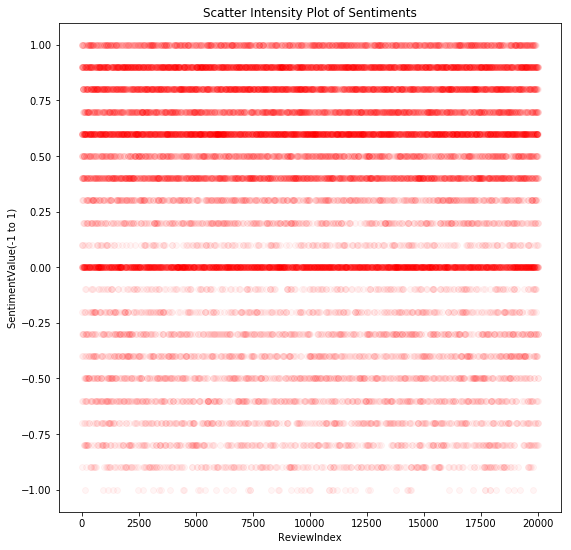

In [38]:
# General plot of sentiment for the first 20,000 reviews
xaxis = []
for i in range(0,20000):
    xaxis.append(i)

ylabel_new_1 = all_sent_values[:20000]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()
# Observation the general plot is towards positive and neutral area

In [39]:
#Total number of products
product_name_20k = []
for item in temp_data["Product Name"]:
    if (item in product_name_20k):
        continue
    else:
        product_name_20k.append(item)

In [40]:
len(product_name_20k)

2221

In [41]:
#No of brands
brands_temp = []
for item in temp_data["Brand Name"]:
    if (item in brands_temp):
        continue
    else:
        brands_temp.append(item)
len(brands_temp)

208

In [42]:
testing2 = pd.pivot_table(temp_data,index=['Brand Name'],values=['Rating', 'Review Votes','SENTIMENT_VALUE'],
               columns=[],aggfunc=[np.sum, np.mean],fill_value=0)
testing2 = testing2.sort_values(by=('sum', 'Rating'), ascending = False)
testing2.head(10)

sum                                   mean               \
           Rating Review Votes SENTIMENT_VALUE    Rating Review Votes   
Brand Name                                                              
Samsung     14851         4449           15017  3.960267     1.186400   
BLU         13715         3802           14293  3.835291     1.063199   
Apple       13305         6020           13516  3.952763     1.788473   
LG           4968         1360            5146  3.824480     1.046959   
BlackBerry   3574         1206            3495  3.680742     1.242019   
Nokia        3509         1324            3729  3.736954     1.410011   
Motorola     3030          878            3163  3.778055     1.094763   
HTC          2631          600            2821  3.574728     0.815217   
CNPGD        2338         1240            2757  3.146703     1.668910   
OtterBox     2073          135            2024  4.373418     0.284810   

                            
           SENTIMENT_VALUE  
Brand Name                  
Samsung           4.004533  
BLU               3.996924  
Apple             4.015449  
LG                3.961509  
BlackBerry        3.599382  
Nokia             3.971246  
Motorola          3.943890  
HTC               3.832880  
CNPGD             3.710633  
OtterBox          4.270042

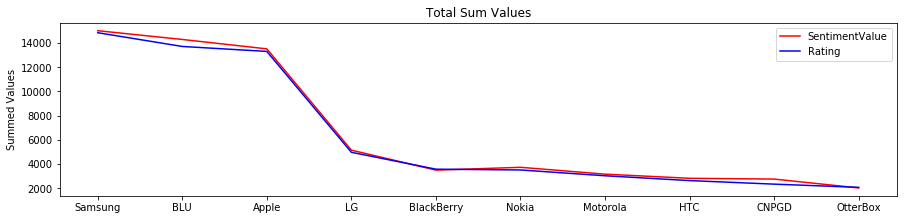

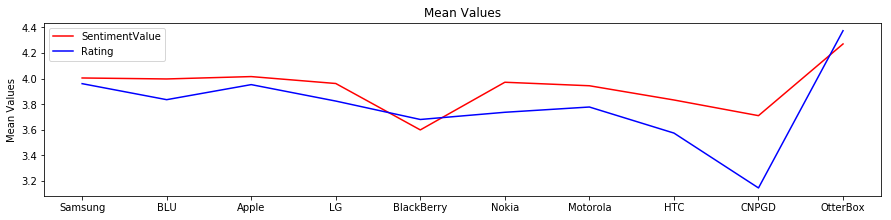

In [43]:
# Sum and Mean plots for the top 10 brands
import pylab

names = testing2.index[:10]
y = testing2['sum', 'SENTIMENT_VALUE'][:10]
y2 = testing2['sum', 'Rating'][:10]



pylab.figure(figsize=(15,7))
x = range(10)
pylab.subplot(2,1,1)
pylab.xticks(x, names)
pylab.ylabel('Summed Values')
pylab.title('Total Sum Values')
pylab.plot(x,y,"r-",x,y2,'b-')
pylab.legend(['SentimentValue', 'Rating'])

y_new = testing2['mean', 'SENTIMENT_VALUE'][:10]
y2_new = testing2['mean', 'Rating'][:10]



pylab.figure(figsize=(15,7))


pylab.subplot(2,1,2)
pylab.xticks(x, names)
pylab.ylabel('Mean Values')
pylab.title('Mean Values')
pylab.plot(x,y_new,"r-",x,y2_new,'b-')
pylab.legend(['SentimentValue', 'Rating'])


pylab.show()

In [44]:
# Sentiment Analysis of Top 5 brands
samsung = []
blu = []
apple = []
lg = []
nokia = []



for i in range(0,20000):
    score = all_sent_values[i]
    brand = temp_data['Brand Name'].iloc[i]
    if (brand == 'Samsung'):
        samsung.append(score)
    elif (brand == 'BLU'):
        blu.append(score)
    elif (brand == 'Apple'):
        apple.append(score)
    elif (brand == 'LG'):
        lg.append(score)
    elif (brand == 'Nokia'):
        nokia.append(score)
    else:
        continue

In [45]:
list_of_brands = [samsung, blu, apple,lg,nokia]
name_of_brands = ['Samsung', 'BLU', 'Apple', 'LG', 'Nokia']

In [46]:
def plot_brand(brand, name):
    pylab.figure(figsize=(20,3))
    x = range(0,800)
    
    #pylab.xticks(x)
    pylab.ylabel('Sentiment')
    pylab.title(name)
    #pylab.plot(x,brand,"ro", alpha = 0.2)
    pylab.plot(x, brand[:800], color='#4A148C', linestyle='none', marker='o',ms=9, alpha = 0.4)
    
    pylab.show()

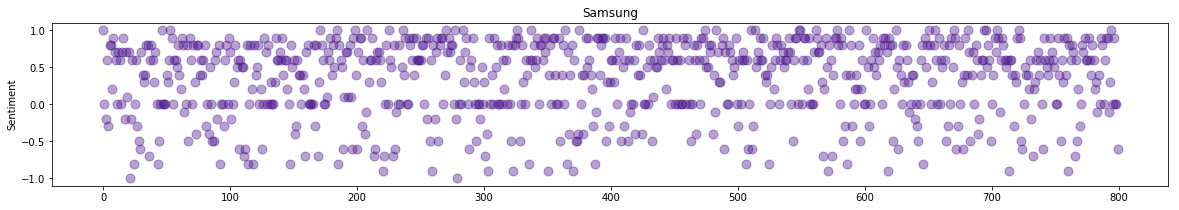

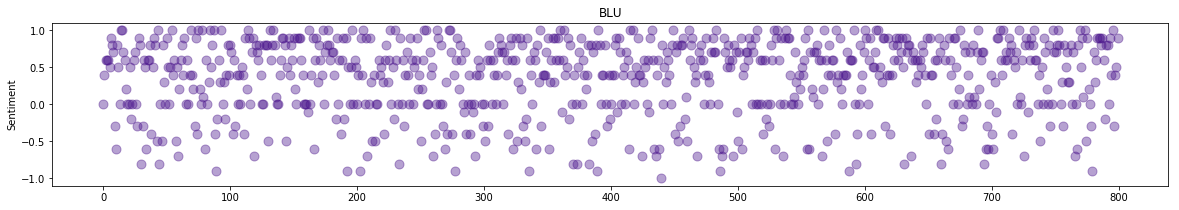

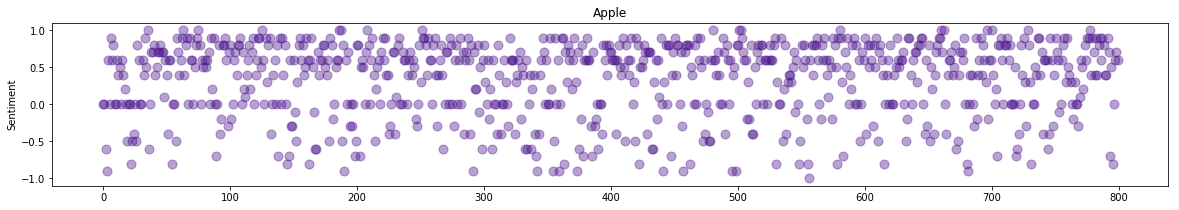

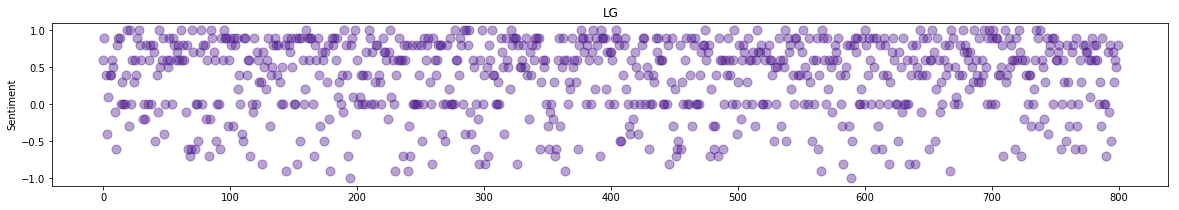

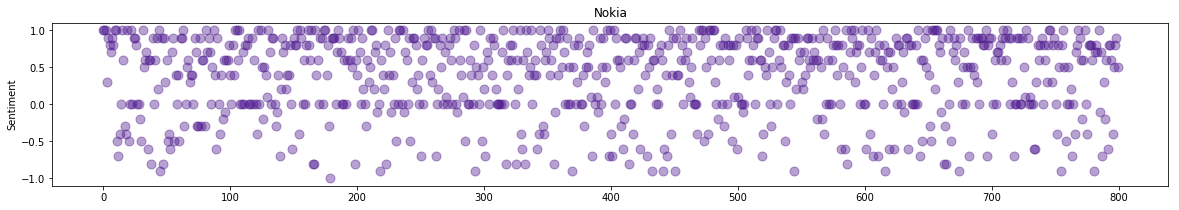

In [47]:
"""
1. Sentiment concentration towards positivity decreases as we move from top to lower brands.
2. Population towards negativity and neutrality keeps on increasing as we move downwards."""
for i in range(0,len(list_of_brands)):
    plot_brand(list_of_brands[i],name_of_brands[i])